# Public Satellite Data

This is a Binder to show and play with the 
<a href="https://www.ucsusa.org/resources/satellite-database">
    Union of Concerned Scientists Satellite Database.
</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

%matplotlib inline

## Data Wrangling

Aka Import and Cleaning

In [2]:
data_url = 'https://s3.amazonaws.com/ucs-documents/nuclear-weapons/sat-database/5-9-19-update/UCS_Satellite_Database_4-1-2019.txt'
df = pd.read_csv(data_url, sep='\t', header=0, encoding="ISO-8859-1", parse_dates=[18])
print("Rows: %d" % len(df))
print("Columns: %d" % len(df.columns))
df.head()

Rows: 2062
Columns: 254


,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253
0,3Cat-1,NR (11/18),Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,NaN,LEO,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Columns: 254 entries, Name of Satellite, Alternate Names to Unnamed: 253
dtypes: datetime64[ns](1), float64(219), int64(1), object(33)
memory usage: 4.0+ MB


### Clean Data

In [4]:
df = df.dropna(axis=1, how='all')
print("Rows: %d" % len(df))
print("Columns: %d" % len(df.columns))
df.head()

Rows: 2062
Columns: 39


,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Source,Source.1,Source.2,Source.3,Source.4,Source.5,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 64
0,3Cat-1,NR (11/18),Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,...,https://spaceflightnow.com/2018/11/29/indian-r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,NaN,LEO,NaN,0.0,...,https://directory.eoportal.org/web/eoportal/sa...,http://www.planet4589.org/space/log/satcat.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,http://spaceflightnow.com/2016/04/26/soyuz-bla...,http://space50.org/objekt.php?mot=2016-025E&ja...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,http://www.absatellite.net/satellite-fleet/?sa...,http://www.zarya.info/Diaries/Launches/Launche...,http://www.absatellite.net/2010/10/13/asia-bro...,http://www.spacenews.com/article/satellite-tel...,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Investigation (can skip)

Why are there 5 source columns? Can I just merge them?

Why did some unnamed columns survive?

In [ ]:
df.iloc[:,-9:]

In [ ]:
def return_value_counts(df, col):
    return df[col].value_counts()

In [ ]:
return_value_counts(df, 'Source.5')

In [ ]:
return_value_counts(df, 'Unnamed: 58')

Let's see if the rows that have Source 5 also have the unnamed entries.

No entry that uses Source 5 uses any of the remaining Unnamed columns

In [ ]:
df.loc[df["Source.5"].notna()]

Let's check the inverse

Okay. All of these are links / sources. There is not enough space to move them sideways into the empty source columns, actually.

Checking Unnamed 58 and 59 yield the same rows. 60 and 64 are subsets of 58 and 59.

If JM/304 and JMSatcat84 don't mean anything, then I can scrap the last column and shuffle over the rest of the links with no problems.

In [ ]:
df.loc[df["Unnamed: 58"].notna()]

In [ ]:
df.loc[df["Unnamed: 64"].notna()]

In [ ]:
df.loc[940]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 39 columns):
Name of Satellite, Alternate Names    2062 non-null object
Country/Org of UN Registry            2062 non-null object
Country of Operator/Owner             2062 non-null object
Operator/Owner                        2062 non-null object
Users                                 2062 non-null object
Purpose                               2062 non-null object
Detailed Purpose                      790 non-null object
Class of Orbit                        2062 non-null object
Type of Orbit                         1457 non-null object
Longitude of GEO (degrees)            2062 non-null float64
Perigee (km)                          2062 non-null object
Apogee (km)                           2062 non-null object
Eccentricity                          2062 non-null float64
Inclination (degrees)                 2062 non-null float64
Period (minutes)                      2062 non-null object
Launch

### Back to data cleaning

Will need to reformat some columns to remove commas. The commas prevent recasting to float.

In [6]:
# Can't do "Power (watts)" because there are letters in at least one entry
# Can't do "Dry Mass (kg.)" because there is a range in at least one entry
cols_to_un_comma = ["Perigee (km)", "Apogee (km)", "Period (minutes)", "Launch Mass (kg.)"]

for col in cols_to_un_comma:
    df.loc[:, col] = df[col].str.replace(',', '').astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 39 columns):
Name of Satellite, Alternate Names    2062 non-null object
Country/Org of UN Registry            2062 non-null object
Country of Operator/Owner             2062 non-null object
Operator/Owner                        2062 non-null object
Users                                 2062 non-null object
Purpose                               2062 non-null object
Detailed Purpose                      790 non-null object
Class of Orbit                        2062 non-null object
Type of Orbit                         1457 non-null object
Longitude of GEO (degrees)            2062 non-null float64
Perigee (km)                          2062 non-null float64
Apogee (km)                           2062 non-null float64
Eccentricity                          2062 non-null float64
Inclination (degrees)                 2062 non-null float64
Period (minutes)                      2062 non-null float64
Lau

## Exploratory Data Analysis

Let's remind ourselves of what we are looking at

In [9]:
df.head()

,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Source,Source.1,Source.2,Source.3,Source.4,Source.5,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 64
0,3Cat-1,NR (11/18),Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,...,https://spaceflightnow.com/2018/11/29/indian-r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,NaN,LEO,NaN,0.0,...,https://directory.eoportal.org/web/eoportal/sa...,http://www.planet4589.org/space/log/satcat.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,http://spaceflightnow.com/2016/04/26/soyuz-bla...,http://space50.org/objekt.php?mot=2016-025E&ja...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,http://www.absatellite.net/satellite-fleet/?sa...,http://www.zarya.info/Diaries/Launches/Launche...,http://www.absatellite.net/2010/10/13/asia-bro...,http://www.spacenews.com/article/satellite-tel...,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['Name of Satellite, Alternate Names', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 27',
       'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2',
       'Source.3', 'Source.4', 'Source.5', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed: 64'],
      dtype='object')

In [11]:
# Generic barh plot function
def plot_barh(df, ycol, title, limit=-1, figsize=(8,6)):
    _ = plt.figure(figsize=figsize)
    _ = df[ycol].value_counts()[:limit].plot(kind='barh')
    _ = plt.xlabel("Number of Satellites")
    _ = plt.title(title)
    return _

How many satellites serve similar purposes?

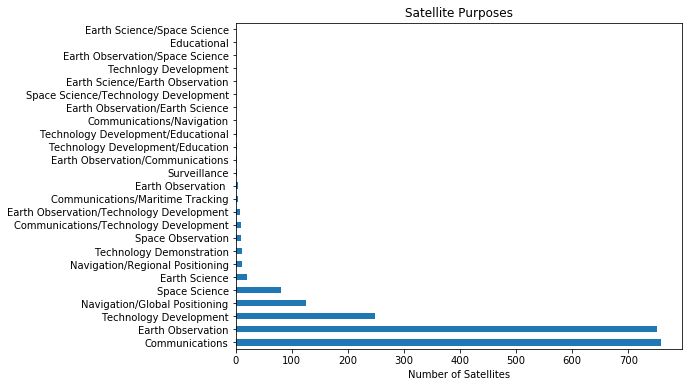

In [12]:
_ = plot_barh(df, "Purpose", "Satellite Purposes")

Who has the most?

With 99 entries, this may be difficult to visualize. Let's do the top 20.

In [13]:
df["Country of Operator/Owner"].value_counts()

USA                         883
China                       296
Russia                      150
Japan                        79
Multinational                63
                           ... 
Japan/Singapore               1
Russia/Multinational          1
China/Brazil                  1
France/Israel                 1
USA/United Kingdom/Italy      1
Name: Country of Operator/Owner, Length: 99, dtype: int64

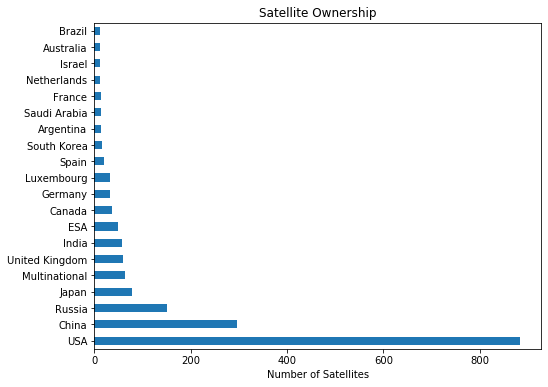

In [14]:
_ = plot_barh(df, "Country of Operator/Owner", "Satellite Ownership", 20)

Who are the users?

That data formatting is annoying. They are just supersets of each other. Think about how to fix that.

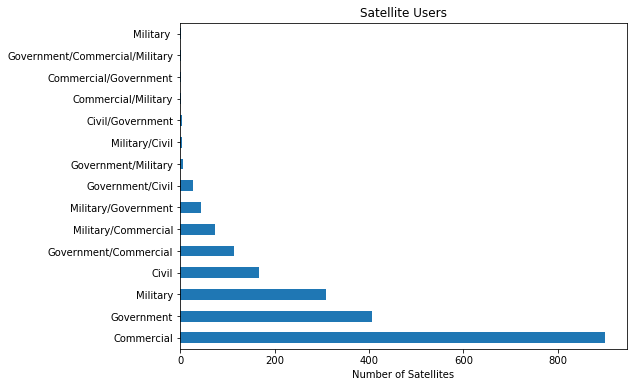

In [15]:
#_ = df["Users"].value_counts().plot(kind='barh')
_ = plot_barh(df, "Users", "Satellite Users")

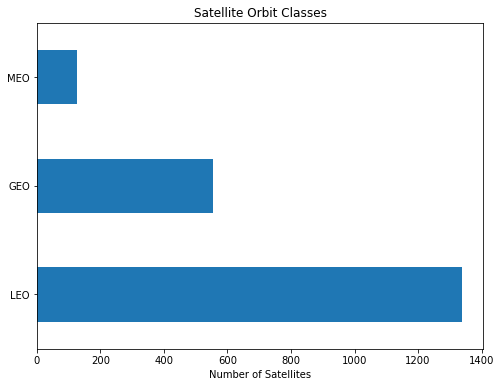

In [16]:
_ = plot_barh(df, "Class of Orbit", "Satellite Orbit Classes")

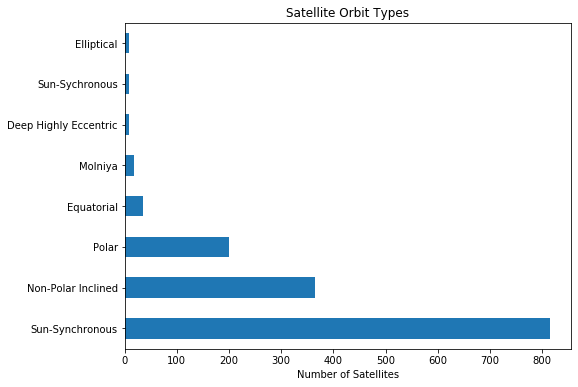

In [17]:
_ = plot_barh(df, "Type of Orbit", "Satellite Orbit Types")

### Some 2D Plots

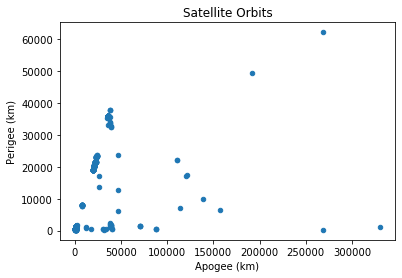

In [18]:
_ = df[["Apogee (km)", "Perigee (km)"]].plot(x='Apogee (km)', y='Perigee (km)', kind='scatter')
_ = plt.title('Satellite Orbits')

How long do satellites last?

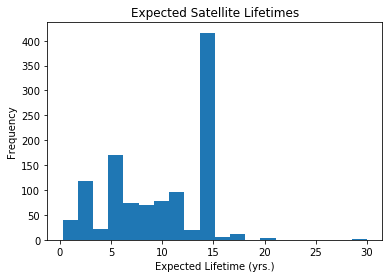

In [19]:
_ = df["Expected Lifetime (yrs.)"].plot.hist(bins=20)
_ = plt.xlabel("Expected Lifetime (yrs.)")
_ = plt.title("Expected Satellite Lifetimes")

Okay, but I want this in terms of when they were launched. This will require me to add together the launch date and the expected lifetime.

In [20]:
satellite_life_df = df[["Date of Launch", "Expected Lifetime (yrs.)"]].join(
    pd.Series(df["Date of Launch"] + pd.to_timedelta(df["Expected Lifetime (yrs.)"], unit='Y'),
              name="Expected End of Life")).dropna()
satellite_life_df.head()

/Users/Stitchclone3/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:208: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  return func(*args, **kwargs)


,Date of Launch,Expected Lifetime (yrs.),Expected End of Life
1,2017-06-23,2.0,2019-06-23 11:38:24
3,2014-02-06,15.0,2029-02-05 15:18:00
4,2016-06-15,15.0,2031-06-15 15:18:00
5,2015-03-02,15.0,2030-03-01 15:18:00
6,2004-03-13,12.0,2016-03-12 21:50:24


Okay, let's plot launch date vs end of life date.

I like the line structure of this plot.

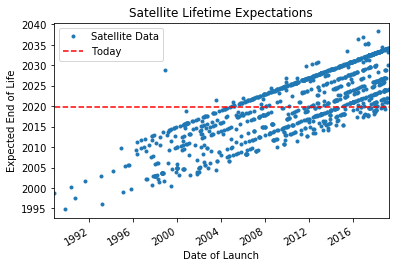

In [21]:
today = pd.to_datetime(datetime.date.today())
today_x = pd.date_range(df["Date of Launch"].min(), df["Date of Launch"].max(), periods=10)
today_y = pd.date_range(datetime.date.today(), datetime.date.today(), periods=10)

_ = satellite_life_df.set_index("Date of Launch").plot(y="Expected End of Life", style=".", label="Satellite Data")
_ = plt.ylabel("Expected End of Life")
_ = plt.plot(today_x, today_y, 'r--', label="Today")
_ = plt.legend()
_ = plt.title("Satellite Lifetime Expectations")

This plot shows satellite end-of-lifetime as a function of when they were launched. The red line shows today. Every point above the red line is a satellite that should still be working. Every plot below the red line is a satellite that we believe no longer works. Right?

In [22]:
print("Number of satellites in the database: %d" % len(df))
print("Number of satellites with lifetime predictions: %d" % len(satellite_life_df))
print("Number of satellites that should still be working: %d" %
     len(satellite_life_df[satellite_life_df["Expected End of Life"] > today]))
print("Number of satellites that should no longer be working: %d" %
     len(satellite_life_df[satellite_life_df["Expected End of Life"] < today]))

Number of satellites in the database: 2062
Number of satellites with lifetime predictions: 1124
Number of satellites that should still be working: 645
Number of satellites that should no longer be working: 479
